In [24]:
import os
import collections

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

if os.getcwd().endswith('notebook'):
    os.chdir('..')

from rna_learn.load import load_dataset
from rna_learn.transform import (
    sequence_embedding, 
    normalize, denormalize,
    make_dataset_balanced,
    one_hot_encode_classes,
    split_train_test_set,
)

In [2]:
sns.set(palette='colorblind', font_scale=1.3)

In [3]:
input_path = os.path.join(os.getcwd(), 'data/ncbi/dataset.csv')
alphabet = ['A', 'T', 'G', 'C']

In [4]:
dataset_df = load_dataset(input_path, alphabet, secondary=False)
dataset_df.shape

(59295, 11)

## Method

- Generate balanced classes with a greater temperature granularity (say about 8-10)
- Select the same number of species & same number of genes in all classes

In [7]:
y = dataset_df['temperature'].values.astype(np.float64)

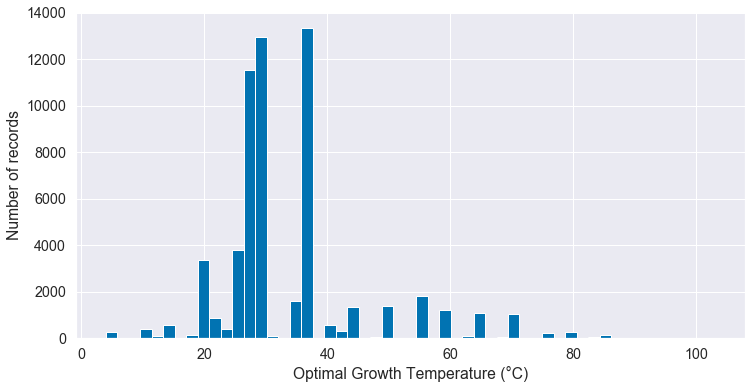

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist(y, bins=len(np.unique(y)));
ax.set_xlabel('Optimal Growth Temperature (°C)');
ax.set_ylabel('Number of records');

In [27]:
def bin_data(y, bins):
    output = []
    counts = collections.defaultdict(int)
    for i, yi in enumerate(y):
        for j, bin_ in enumerate(bins):
            if yi >= bin_[0] and yi < bin_[1]:
                output.append(j)
                counts[j] += 1
                
                break
            else:
                continue
                
    for i in range(len(bins)):
        print(bins[i], counts[i])
        
    return np.array(output)

In [36]:
bins = [
    [4, 25],
    [25, 30],
    [30, 35],
    [35, 40],
    [40, 50],
    [50, 60],
    [60, 80],
]
y_binned = bin_data(y, bins)
y_binned.shape, len(bins)

[4, 25] 6168
[25, 30] 15357
[30, 35] 13083
[35, 40] 14879
[40, 50] 2270
[50, 60] 3231
[60, 80] 3773


((58761,), 7)

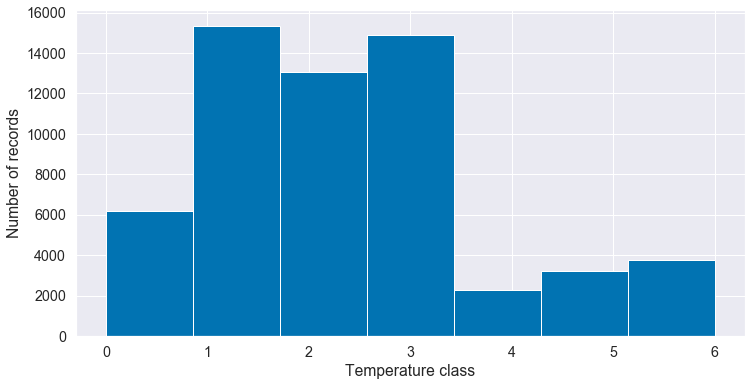

In [37]:
f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist(y_binned, bins=len(np.unique(y_binned)));
ax.set_xlabel('Temperature class');
ax.set_ylabel('Number of records');